<a href="https://colab.research.google.com/github/FizaAnwar/pfsintern/blob/main/Customer_Segmentation_or_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [ ]:
# loading the data from csv file to pandas dataframe
customer_data = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')

In [ ]:
#first five rows
customer_data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
# finding no of rows and columns
customer_data.shape

(350, 11)

In [ ]:
# geeting info about dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
# checking missing values
customer_data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [ ]:
# filling the missing values
customer_data['Satisfaction Level'].fillna(customer_data['Satisfaction Level'].mode()[0], inplace=True)

In [ ]:
# again checking missing values
customer_data.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

choosing total spend and purchase item columns

In [ ]:
X = customer_data.iloc[:,[5,6]] .values

In [ ]:
print(X)

[[1120.2    14.  ]
 [ 780.5    11.  ]
 [ 510.75    9.  ]
 [1480.3    19.  ]
 [ 720.4    13.  ]
 [ 440.8     8.  ]
 [1150.6    15.  ]
 [ 800.9    12.  ]
 [ 495.25   10.  ]
 [1520.1    21.  ]
 [ 690.3    11.  ]
 [ 470.5     7.  ]
 [1200.8    16.  ]
 [ 820.75   13.  ]
 [ 530.4     9.  ]
 [1360.2    18.  ]
 [ 700.6    12.  ]
 [ 450.9     8.  ]
 [1170.3    14.  ]
 [ 790.2    11.  ]
 [ 505.75   10.  ]
 [1470.5    20.  ]
 [ 710.4    13.  ]
 [ 430.8     7.  ]
 [1140.6    15.  ]
 [ 810.9    12.  ]
 [ 485.25    9.  ]
 [1500.1    21.  ]
 [ 670.3    10.  ]
 [ 460.5     8.  ]
 [1190.8    16.  ]
 [ 830.75   13.  ]
 [ 520.4     9.  ]
 [1370.2    18.  ]
 [ 690.6    12.  ]
 [ 440.9     8.  ]
 [1160.3    14.  ]
 [ 800.2    11.  ]
 [ 500.75   10.  ]
 [1460.5    20.  ]
 [ 700.4    13.  ]
 [ 420.8     7.  ]
 [1130.6    15.  ]
 [ 820.9    12.  ]
 [ 480.25    9.  ]
 [1490.1    21.  ]
 [ 680.3    10.  ]
 [ 470.5     8.  ]
 [1180.8    16.  ]
 [ 790.2    11.  ]
 [ 505.75   10.  ]
 [1470.5    20.  ]
 [ 710.4    

Choosing Number of Clusters

WCSS _ Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different clusters
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

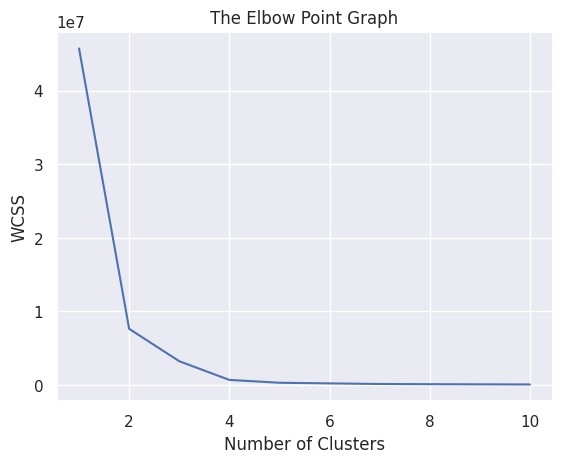

In [ ]:
# plot elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of cluster is = 4

Training K-Mean Cluster model

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each datapoint based on thier cluster
Y=kmeans.fit_predict(X)

print(Y)


[2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2
 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0
 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3
 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1
 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0
 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2
 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0
 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3
 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3 1
 0 3 2 0 3 1 0 3 2 0 3 1 0 3 2 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 Clusters - 0,1,2,3

Visualizing all the clusters

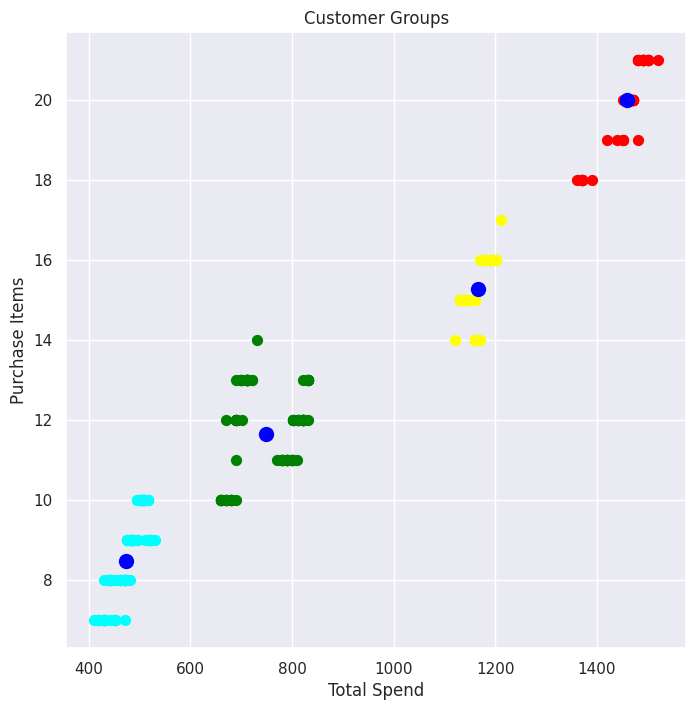

In [ ]:
# plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

#plot the Centriods
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Items')

plt.show()

In [ ]:
# overall behaviour of customers is that they are spending the money to buy the same product/items thats why datapoints of clusters are so near to eachother